In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from apl.prep.prep import preprocess, operations
from apl.prep.ohe import fitted_ohe

In [2]:
def get_data():
    from apl.data import read_data
    from apl.prep.prelim import xcolms, ycolm
    from apl.prep.prep import sample
    df = read_data()
    df.drop_duplicates(inplace=True)
    df = df[xcolms+[ycolm]]
    data = sample(df, ycolm, 3, random_state=1234)
    x,y = data, data['Failure']
    return df, x, y

df, xtrain, ytrain = get_data()
ohe = fitted_ohe(operations['oneHotEncode'], df)
preprocessor = preprocess(operations, ohe, scale=True)
xtrain = preprocessor.fit_transform(xtrain)

reading  /home/pranay/Desktop/apple/apl/data/data_exercise2.csv
fitting...
transforming...


In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

In [9]:
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=xtrain.columns,  
                      class_names=['0s','1s'],  
                      filled=True, rounded=True,  
                      special_characters=True)  

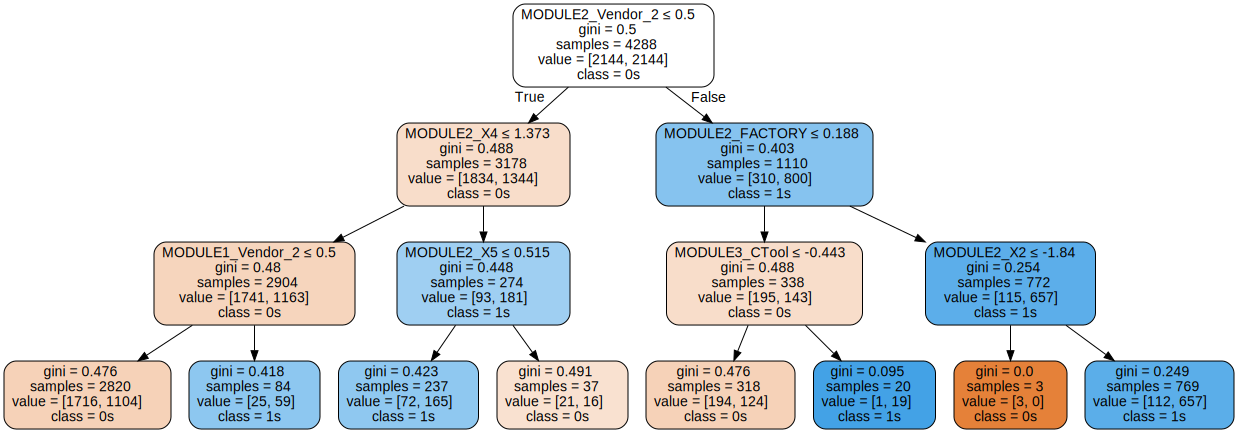

In [10]:
import graphviz
graph = graphviz.Source(dot_data)  
graph 